#                Cricket ODI world cup 2023 Data Processing

# Importing Pandas as an alias 'pd'

In [1]:
import pandas as pd

# Reading the .csv file containing the data of all match summary

In [2]:
data = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\prof_project\match_schedule_results.csv")

# Creating a DataFrame structure of the read data

In [3]:
df = pd.DataFrame(data)

# Analyzing the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Match_no       48 non-null     int64 
 1   Date           48 non-null     object
 2   Venue          48 non-null     object
 3   Team1          48 non-null     object
 4   Team2          48 non-null     object
 5   Winner         48 non-null     object
 6   Scorecard URL  48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


In [5]:
df.describe()

,Match_no
count,48.00
mean,24.50
std,14.00
min,1.00
25%,12.75
50%,24.50
75%,36.25
max,48.00


In [21]:
df.head() #Gives an output of first 5 data from the dataframe

,Match_no,Date,Venue,Team1,Team2,Winner,Match_id
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


# Renaming a column from the table from 'Scorecard URL' to 'Match_id' 

In [130]:
df.rename(columns = { 'Scorecard URL' : 'Match_id' }, inplace = True) 

In [12]:
df.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Match_id
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


# Creating a dictionary that gives the Match_id data for its corresponding Match_Between

In [101]:
match_ids_dict = {}

for index, row in df.iterrows():
    key1 = row['Team1'] + 'vs' + row['Team2']
    key2 = row['Team2'] + 'vs' + row['Team1']

    match_ids_dict[key1] = row["Match_id"]
    match_ids_dict[key2] = row["Match_id"]

dict_df = pd.DataFrame.from_dict(match_ids_dict, orient='index')
dict_df.head()

,0
England vs New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
New ZealandvsEngland,https://www.cricketwa.com/scorecard/18020/engl...
Pakistan vs Netherlands,https://www.cricketwa.com/scorecard/18021/paki...
NetherlandsvsPakistan,https://www.cricketwa.com/scorecard/18021/paki...
Bangladesh vs Afghanistan,https://www.cricketwa.com/scorecard/23008/bang...


# Importing the data from batting_summary csv file and creating a dataframe called 'batting_data'

In [102]:
batting_data = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\prof_project\batting_summary.csv")

In [105]:
batting_df = pd.DataFrame(batting_data)
batting_df.tail(1)

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
915,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,200.000


# Ranking and Sorting

In [108]:
total_runs = batting_df.groupby('Batsman_Name')['Runs'].sum().reset_index()
total_runs.columns = ['Player', 'Total Runs']
total_runs_df = pd.DataFrame(total_runs)
total_runs_df
sorted_runs_df = total_runs_df.sort_values(by='Total Runs', ascending = False)
sorted_runs_df.head()

,Player,Total Runs
143,Virat Kohli,765
103,Quinton de Kock,706
113,Rohit Sharma,597
104,Rachin Ravindra,578
21,David Warner,577


In [54]:
batting_df['Highest_score_ranking'] = batting_df['Runs'].rank(ascending = True)
batting_df = batting_df.set_index('Highest_score_ranking')
sorted_df = batting_df.sort_values(by =['Highest_score_ranking'], ascending = False)
sorted_df.head()
# batting_df

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,Match_id
Highest_score_ranking,,,,,,,,,,,,
916.0,39,Afghanistan vs Australia,Australia,Glenn Maxwell,6,not out,201,128,21,10,157.000,NaN
915.0,43,Bangladesh vs Australia,Australia,Mitchell Marsh,3,not out,177,132,17,9,134.091,NaN
914.0,23,South Africa vs Bangladesh,South Africa,Quinton de Kock,1,c Nasum Ahmed b Hasan Mahmud,174,140,15,7,124.286,https://www.cricketwa.com/scorecard/23028/sout...
913.0,18,Australia vs Pakistan,Australia,David Warner,1,c Shadab Khan sub b Haris Rauf,163,124,14,9,131.452,https://www.cricketwa.com/scorecard/23023/aust...
912.0,1,England vs New Zealand,New Zealand,Devon Conway,1,not out,152,121,19,3,125.600,https://www.cricketwa.com/scorecard/18020/engl...


# Creating a new column in the batting_df table and mapping the data from 'match_ids_dict' dictionary

In [14]:
batting_df['Match_id'] = batting_df['Match_Between'].map(match_ids_dict)
batting_df.tail()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate,Match_id
911,48,India vs Australia,Australia,Travis Head,2,c Shubman Gill b Mohammed Siraj,137,120,15,4,114.167,https://www.cricketwa.com/scorecard/23010/indi...
912,48,India vs Australia,Australia,Mitchell Marsh,3,c KL Rahul b Jasprit Bumrah,15,15,1,1,100.000,https://www.cricketwa.com/scorecard/23010/indi...
913,48,India vs Australia,Australia,Steve Smith,4,lbw b Jasprit Bumrah,4,9,1,0,44.444,https://www.cricketwa.com/scorecard/23010/indi...
914,48,India vs Australia,Australia,Marnus Labuschagne,5,not out,58,110,4,0,52.727,https://www.cricketwa.com/scorecard/23010/indi...
915,48,India vs Australia,Australia,Glenn Maxwell,6,not out,2,1,0,0,200.000,https://www.cricketwa.com/scorecard/23010/indi...


# Importing Bowling data from bowling_summary csv file

In [116]:
bowling_data = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\prof_project\bowling_summary.csv")

In [117]:
bowling_df = pd.DataFrame(bowling_data)
bowling_df.head()

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [122]:
total_wickets = bowling_df.groupby('Bowler_Name')['Wickets'].sum().reset_index()
total_wickets.columns = ['Player', 'Total Wickets']
total_wickets_df = pd.DataFrame(total_wickets)
total_wickets_df
sorted_wickets_df = total_wickets_df.sort_values(by='Total Wickets', ascending = False)
top_bowlers = sorted_wickets_df.head(10)
top_bowlers

,Player,Total Wickets
63,Mohammed Shami,24
0,Adam Zampa,23
18,Dilshan Madushanka,21
23,Gerald Coetzee,20
33,Jasprit Bumrah,20
86,Shaheen Afridi,18
50,Marco Jansen,17
36,Josh Hazlewood,16
58,Mitchell Starc,16
77,Ravindra Jadeja,16


# Importing players information 

In [84]:
playersinfo_data = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\prof_project\world_cup_players_info.csv")

In [85]:
playersinfo_df = pd.DataFrame(playersinfo_data)
playersinfo_df.head()

,player_name,team_name,image_of_player,battingStyle,bowlingStyle,playingRole,description
0,Jonny Bairstow,England,,Right-hand bat,Right-arm fast-medium,Wicketkeeper Batter,Jonny Bairstow is an English cricketer known f...
1,Joe Root,England,,Right hand Bat,Right arm Offbreak,Top order Batter,Joe Root is an English cricketer known for his...
2,Jos Buttler,England,,Right hand Bat,,Wicketkeeper Batter,Jos Buttler is an English cricketer known for ...
3,Will Young,New Zealand,,Right hand Bat,Right arm Offbreak,Top order Batter,Will Young is a New Zealand cricketer known fo...
4,Rachin Ravindra,New Zealand,,Left hand Bat,Slow Left arm Orthodox,Top order Batter,Rachin Ravindra is a New Zealand cricketer kno...


In [65]:
playersinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_name      151 non-null    object
 1   team_name        151 non-null    object
 2   image_of_player  85 non-null     object
 3   battingStyle     151 non-null    object
 4   bowlingStyle     145 non-null    object
 5   playingRole      151 non-null    object
 6   description      134 non-null    object
dtypes: object(7)
memory usage: 8.4+ KB


In [67]:
values = {'bowlingStyle':'Not a Bowler.', 'description':'Not enough information.'}
filled_playersinfo_df = playersinfo_df.fillna(value = values)
filled_playersinfo_df.tail()

,player_name,team_name,image_of_player,battingStyle,bowlingStyle,playingRole,description
146,Shariz Ahmad,Netherlands,NaN,Left hand Bat,Legbreak Googly,Bowler,Not enough information.
147,Dushmantha Chameera,Sri Lanka,NaN,Right hand Bat,Right arm Fast,Bowler,"Tall, slim and slippery, Dushmantha Chameera a..."
148,Tim Southee,New Zealand,"https://img1.hscicdn.com/image/upload/f_auto,t...",Right hand Bat,Right arm Medium fast,Bowler,"Tim Southee, a right-arm swing bowler, burst u..."
149,Ravichandran Ashwin,India,NaN,Right hand Bat,Right arm Offbreak,Bowling Allrounder,R Ashwin took the tricks and skills he learned...
150,Ish Sodhi,New Zealand,NaN,Right hand Bat,Legbreak,Bowler,There is little in Ish Sodhi's statistics to s...


In [63]:
filled_playersinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_name      151 non-null    object
 1   team_name        151 non-null    object
 2   image_of_player  85 non-null     object
 3   battingStyle     151 non-null    object
 4   bowlingStyle     151 non-null    object
 5   playingRole      151 non-null    object
 6   description      151 non-null    object
dtypes: object(7)
memory usage: 8.4+ KB


In [70]:
grouped = filled_playersinfo_df.groupby('battingStyle')
data = grouped.get_group('Right hand Bat')
grouped_df = pd.DataFrame(data)
grouped_df.head()

,player_name,team_name,image_of_player,battingStyle,bowlingStyle,playingRole,description
1,Joe Root,England,,Right hand Bat,Right arm Offbreak,Top order Batter,Joe Root is an English cricketer known for his...
2,Jos Buttler,England,,Right hand Bat,,Wicketkeeper Batter,Jos Buttler is an English cricketer known for ...
3,Will Young,New Zealand,,Right hand Bat,Right arm Offbreak,Top order Batter,Will Young is a New Zealand cricketer known fo...
6,Babar Azam,Pakistan,,Right hand Bat,Right arm Offbreak,Top order Batter,Babar Azam is a Pakistani cricketer known for ...
8,Hasan Ali,Pakistan,,Right hand Bat,Right arm Fast medium,Bowler,Hasan Ali is a Pakistani cricketer known for h...


# Left-alignment Data

In [80]:
bowling_df = pd.DataFrame(bowling_data)
left_align_bowlers = bowling_df.head().style.set_properties(**{'text-align':'left'})
left_align_bowlers

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.000000,1,48,1,4.800000
1,1,England vs New Zealand,New Zealand,Matt Henry,10.000000,1,48,3,4.800000
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.000000,0,37,2,3.700000
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.000000,0,56,0,8.000000
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.000000,0,76,1,7.600000


# Left Alignment Title

In [82]:
title_aligned_bowlers = left_align_bowlers.set_table_styles([dict(selector='th',props=[('text-align','left')])])
display(title_aligned_bowlers)

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.000000,1,48,1,4.800000
1,1,England vs New Zealand,New Zealand,Matt Henry,10.000000,1,48,3,4.800000
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.000000,0,37,2,3.700000
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.000000,0,56,0,8.000000
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.000000,0,76,1,7.600000


# Displaying the correlation between the numerical valued columns in the table

In [92]:
dropped_bowling_df = bowling_df.drop(bowling_df.columns[[0,1,2,3]], axis = 1)
dropped_bowling_df
dropped_bowling_df.corr()

,Overs,Maidens,Runs,Wickets,Economy
Overs,1.000000,0.175619,0.683496,0.444841,-0.240376
Maidens,0.175619,1.000000,-0.140609,0.233536,-0.348841
Runs,0.683496,-0.140609,1.000000,0.209165,0.459376
Wickets,0.444841,0.233536,0.209165,1.000000,-0.231011
Economy,-0.240376,-0.348841,0.459376,-0.231011,1.000000


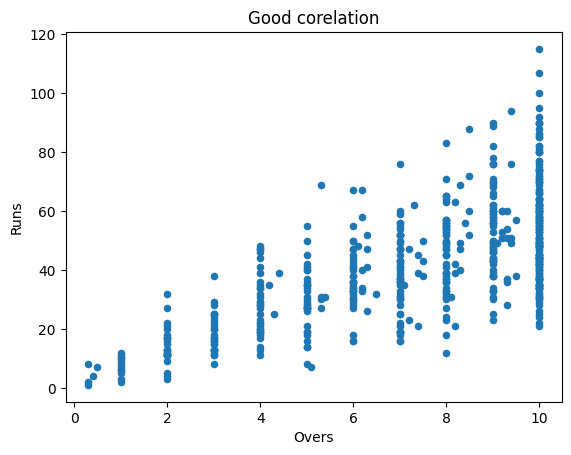

In [94]:
import matplotlib
import matplotlib.pyplot as plt
dropped_bowling_df.plot(kind='scatter', x='Overs', y='Runs')
plt.title('Good corelation')
plt.show()

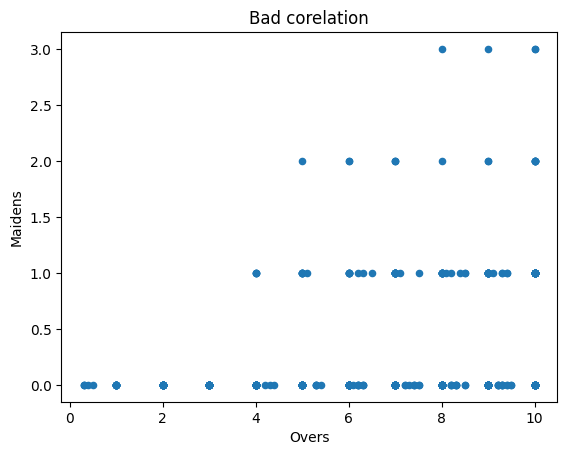

In [95]:
dropped_bowling_df.plot(kind='scatter', x='Overs', y='Maidens')
plt.title('Bad corelation')
plt.show()

# Visualization

In [74]:
import matplotlib
import matplotlib.pyplot as plt


# Listing out the top 10 batsmen and run getters of the tournament

In [124]:
total_runs = batting_df.groupby('Batsman_Name')['Runs'].sum().reset_index()
total_runs.columns = ['Player', 'Total Runs']
total_runs_df = pd.DataFrame(total_runs)
total_runs_df
sorted_runs_df = total_runs_df.sort_values(by='Total Runs', ascending = False)
top_batters = sorted_runs_df.head(10)
top_batters

,Player,Total Runs
143,Virat Kohli,765
103,Quinton de Kock,706
113,Rohit Sharma,597
104,Rachin Ravindra,578
21,David Warner,577
18,Daryl Mitchell,552
125,Shreyas Iyer,530
108,Rassie van der Dussen,480
20,David Miller,474
4,Aiden Markram,472


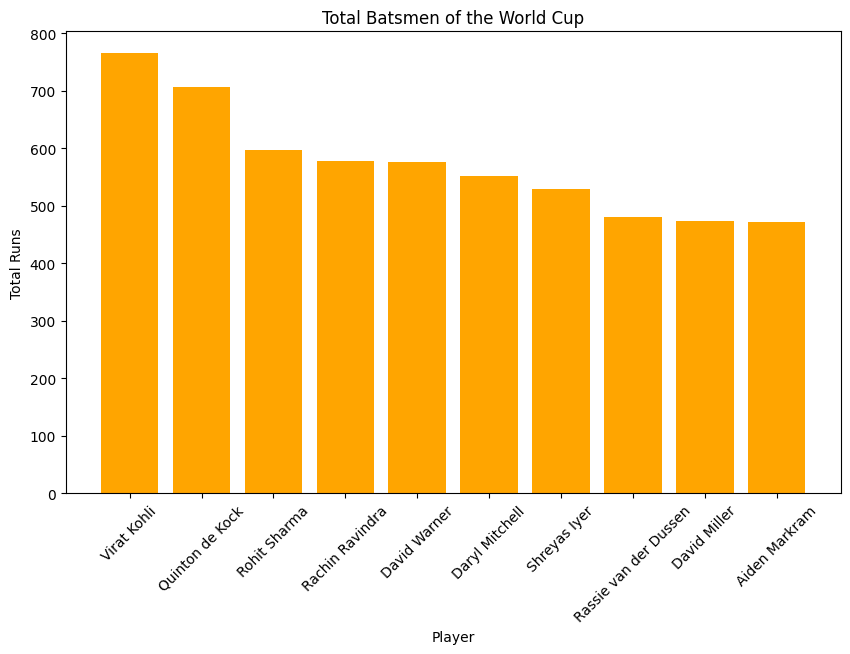

In [129]:
plt.figure(figsize=(10, 6))  
plt.bar(top_batters['Player'], top_batters['Total Runs'], color='orange')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.title('Total Batsmen of the World Cup')
plt.xticks(rotation=45)  
plt.show()

# Listing out the top 10 bowlers and wicket takers of the tournament

In [123]:
total_wickets = bowling_df.groupby('Bowler_Name')['Wickets'].sum().reset_index()
total_wickets.columns = ['Player', 'Total Wickets']
total_wickets_df = pd.DataFrame(total_wickets)
total_wickets_df
sorted_wickets_df = total_wickets_df.sort_values(by='Total Wickets', ascending = False)
top_bowlers = sorted_wickets_df.head(10)
top_bowlers

,Player,Total Wickets
63,Mohammed Shami,24
0,Adam Zampa,23
18,Dilshan Madushanka,21
23,Gerald Coetzee,20
33,Jasprit Bumrah,20
86,Shaheen Afridi,18
50,Marco Jansen,17
36,Josh Hazlewood,16
58,Mitchell Starc,16
77,Ravindra Jadeja,16


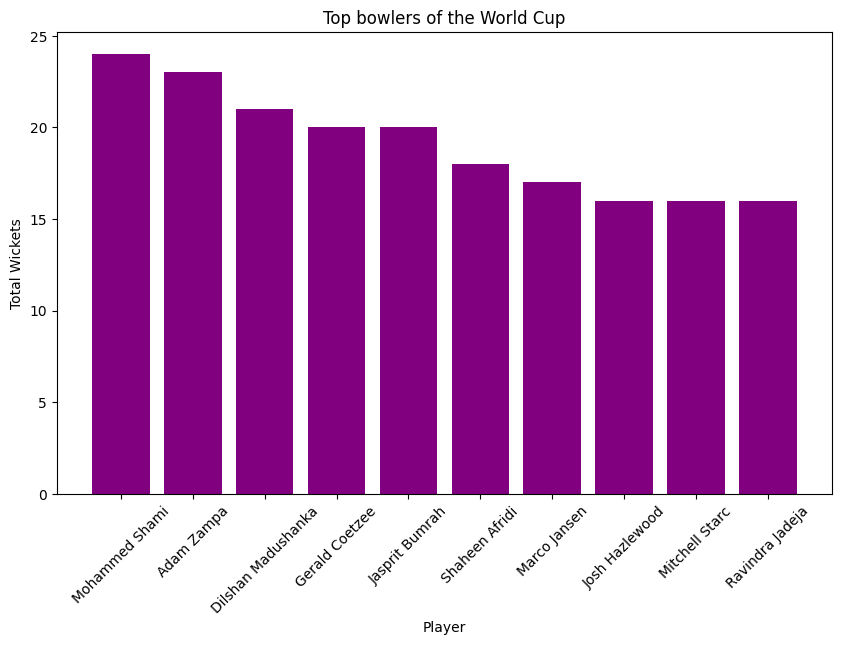

In [128]:
plt.figure(figsize=(10, 6))  
plt.bar(top_bowlers['Player'], top_bowlers['Total Wickets'], color='purple')
plt.xlabel('Player')
plt.ylabel('Total Wickets')
plt.title('Top bowlers of the World Cup')
plt.xticks(rotation=45)  
plt.show()

# Displaying the total wins by each team and its pie-chart visualization

In [132]:
win_counts = df['Winner'].value_counts().reset_index()
win_counts.columns = ['Team', 'Wins']
win_df = pd.DataFrame(win_counts)
win_df

,Team,Wins
0,Australia,9
1,India,9
2,South Africa,7
3,New Zealand,5
4,Pakistan,4
5,Afghanistan,4
6,Sri Lanka,3
7,England,3
8,Bangladesh,2
9,Netherlands,2


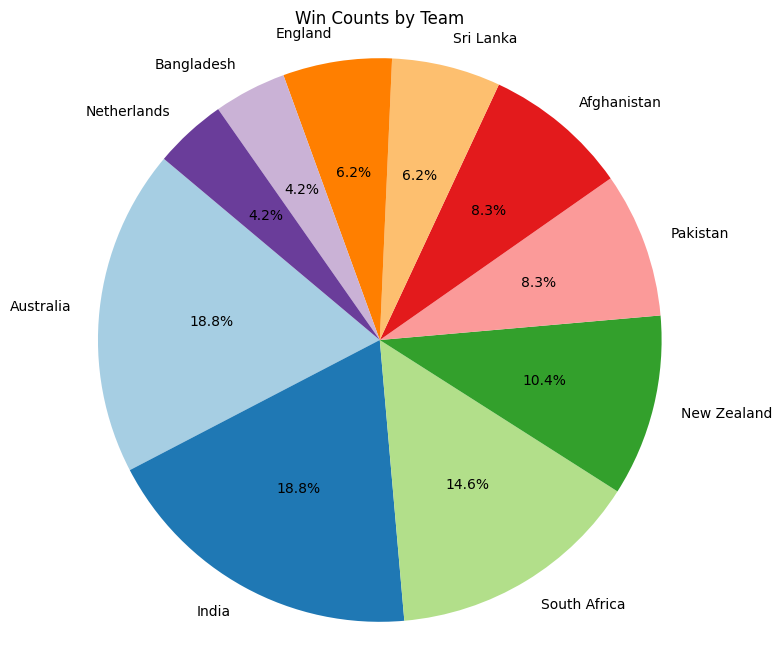

In [134]:
plt.figure(figsize=(8, 8))
plt.pie(win_counts['Wins'], labels=win_counts['Team'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Win Counts by Team')
plt.axis('equal')  
plt.show()